In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Loan.csv")

In [4]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
df.shape

(614, 13)

### Data Cleaning and Filling missing values
##### Check where there are missing values and fix them appropriately

In [6]:
df.isnull()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False        True             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
..               ...                ...         ...               ...   
609            False              False       False             False   
610            False              False       False             False   
611            False              False       False             False   
612            False              False       False             False   
613            False              False       False             False   

     Credit_History  Property_Area  Loan_Status  
0             False          False        False  
1             False          False        False  
2             False          False        False  
3             False          False        False  
4             False          False        False  
..              ...            ...          ...  
609           False          False        False  
610           False          False        False  
611           False          False        False  
612           False          False        False  
613           False          False        False  

[614 rows x 13 columns]

In [7]:
total = df.isnull().sum() #to calculate the total no. of missing values in each columns

In [8]:
total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender'].value_counts() #to count the total no. of each values of the gender column

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df.Gender = df.Gender.fillna('Male') #filling missing values in Gender columns with 'Male'

In [11]:
df['Married'].value_counts()#to count the total no. of each values of the Married column

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df.Married = df.Married.fillna('Yes')

In [13]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
df.Dependents=df.Dependents.fillna('0')

In [15]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
df.Dependents=df.Dependents.fillna('No')

In [17]:
mean = df.LoanAmount.mean()
mean

146.41216216216216

In [18]:
df.LoanAmount=df.LoanAmount.fillna(mean) #to fill the missing values with mean value

In [19]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360.0)

In [21]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
df.Credit_History=df.Credit_History.fillna(1.0)

In [23]:
total=df.isnull().sum()
total

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Converting Categorical variable into numeric:

In [24]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [25]:
df.head(10)

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   
5  LP001011       1        1           2          0              1   
6  LP001013       1        1           0          1              0   
7  LP001014       1        1           3          0              0   
8  LP001018       1        1           2          0              0   
9  LP001020       1        1           1          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   
5             5417             4196.0  267.000000             360.0   
6             2333             1516.0   95.000000             360.0   
7             3036             2504.0  158.000000             360.0   
8             4006             1526.0  168.000000             360.0   
9            12841            10968.0  349.000000             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1  
5             1.0              2            1  
6             1.0              2            1  
7             0.0              1            0  
8             1.0              2            1  
9             1.0              1            0

### Feature Selection
#### Here the iloc indexer for Pandas DataFrame is used for integer-location based indexing/selection by position

In [26]:
X = df.iloc[:,1:12]
y = df.iloc[:,12]

### Splitting Data

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [28]:
X_train.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
90        1        1           0          0              0             2958   
533       1        0           1          0              0            11250   
452       1        1           0          0              0             3948   
355       0        0           0          0              0             3813   
266       1        1           2          0              0             4708   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
90              2900.0       131.0             360.0             1.0   
533                0.0       196.0             360.0             1.0   
452             1733.0       149.0             360.0             0.0   
355                0.0       116.0             180.0             1.0   
266             1387.0       150.0             360.0             1.0   

     Property_Area  
90               1  
533              1  
452              0  
355              2  
266              1

### Building Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [30]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [31]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

### Model Evaluation

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6910569105691057


In [42]:
loanstatus=model.predict([[1,1,1,0,0,8000,2000,130,24,0.0,2]])
loanstatus

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

##### Since, 0.69 is not a good accuracy so we use other classification model.

### Using Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression() #creating logistic regression classifier object
logistic_regression.fit(X_train,y_train) #fit the model with the data 
y_pred=logistic_regression.predict(X_test) #predicting with test values

In [35]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

#### Visualizing Confusion matrix using Heatmap

In [36]:
#model evaluation using the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[15, 18],
       [ 2, 88]], dtype=int64)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8373983739837398


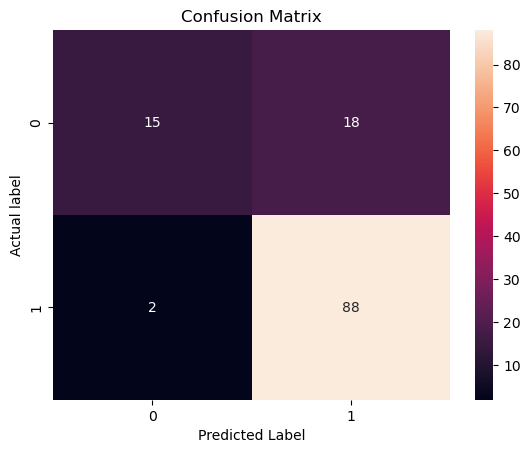

In [38]:
#Visualization using Heat Map
import seaborn as sn
sn.heatmap(cnf_matrix,annot=True) #here annot- an array of same shape as data which is used to annotate the heatmap
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')
plt.show()


<AxesSubplot:>

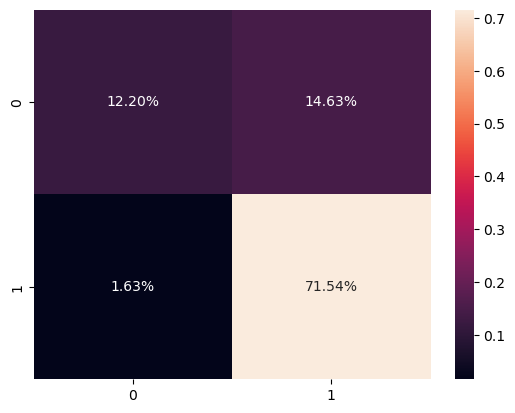

In [39]:
#heatmap with percentage
sn.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%')
#fmt = string formatting code to use when adding annotations.

In [46]:
#Predicting loan for a person
loan_status=logistic_regression.predict([[0,1,1,0,0,6000,2000,530,24,0.0,2]])
print(loan_status)

[0]


C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
